In [381]:
import pandas as pd
from prob3 import *
from scipy.stats import mode
import matplotlib.pyplot as plt

In [382]:
res = pd.read_pickle("results/prob3_mcmc_ara.pkl")

In [383]:
p_d = res["p_a"]

In [249]:
## Main APS loop

In [250]:
def propose(x_given, x_values):
    if x_given == x_values[0]:
        return( np.random.choice([x_values[1], x_values[-1]],
        p=[0.5, 0.5]) )

    if x_given == x_values[-1]:
        return( np.random.choice([x_values[0], x_values[-2]],
        p=[0.5, 0.5]) )

    idx = list(x_values).index(x_given)
    return( np.random.choice([x_values[idx+1], x_values[idx-1]],
    p=[0.5, 0.5]) )


In [251]:
N_aps = 10000000
burnin = 0.20
##
d_sim = np.zeros(N_aps, dtype = int)
d_sim[0] = np.random.choice(d_values)
a_sim = np.random.choice(a_values, p=p_d.loc[d_sim[0]])
theta_sim = prob(d_sim[0], a_sim)

In [252]:
for i in range(1,N_aps):
    ## Update d
    d_tilde = propose(d_sim[i-1], d_values)
    a_tilde = np.random.choice(a_values, p=p_d.loc[d_tilde])
    theta_tilde = prob(d_tilde, a_tilde)

    num = d_util(d_tilde, theta_tilde)

    den = d_util(d_sim[i-1], theta_sim)


    if np.random.uniform() <= num/den:
        d_sim[i] = d_tilde
        a_sim = a_tilde
        theta_sim = theta_tilde
    else:
        d_sim[i] = d_sim[i-1]


d_dist = d_sim[int(burnin*N_aps):]
#return(mode(d_dist)[0], p_d, d_dist)


In [372]:
df_ddist = pd.read_csv("dist.csv")

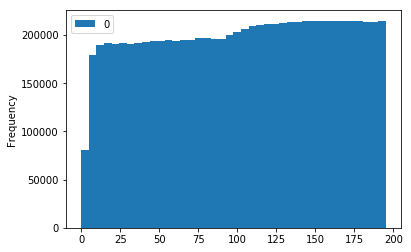

In [373]:
# df_ddist = pd.DataFrame(d_dist)
df_ddist.plot.hist( bins = len(d_values) )
plt.show()

In [243]:
N_aps = 100000
burnin = 0.20
J = 1000
##
d_sim = np.zeros(N_aps, dtype = int)
d_sim[0] = np.random.choice(d_values)
print(d_sim[0])
a_sim = np.random.choice(a_values, p=p_d.loc[d_sim[0]])
theta_sim = prob(d_sim[0], a_sim, size=J)

for i in range(1,N_aps):
    ## Update d
    #d_tilde = propose(d_sim[i-1])
    d_tilde = propose(d_sim[i-1], d_values)
    a_tilde = np.random.choice(a_values, p=p_d.loc[d_tilde])
    theta_tilde = prob(d_tilde, a_tilde, size=J)

    num = d_util(d_tilde, theta_tilde)

    den = d_util(d_sim[i-1], theta_sim)

    if np.random.uniform() <= np.prod(num/den):
        d_sim[i] = d_tilde
        a_sim = a_tilde
        theta_sim = theta_tilde
    else:
        d_sim[i] = d_sim[i-1]

d_dist = d_sim[int(burnin*N_aps):]
###

195


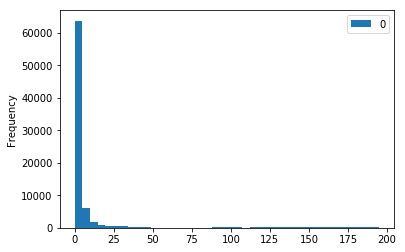

In [244]:
df_ddist = pd.DataFrame(d_dist)
df_ddist.plot.hist( bins = len(d_values) )
plt.show()

In [242]:
mode(d_dist)

ModeResult(mode=array([0]), count=array([6051]))

In [140]:
## MCMC

In [379]:
d_values = np.arange(0, 1000, 100)

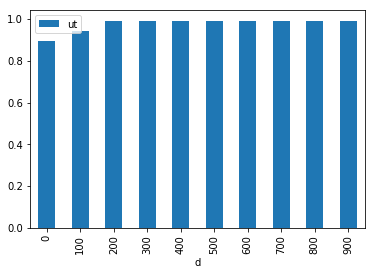

In [380]:
mcmc_iters = 10000
##
psi_d = np.zeros(len(d_values), dtype=float) 
for i, d in enumerate(d_values):
    a = np.random.choice(a_values, p=p_d.loc[d_tilde], size=mcmc_iters)
    theta_d = np.array([])
    for k in a:
        theta_d = np.append(theta_d,prob(d,k))
    value = d_util(d, theta_d).mean()
    psi_d[i] = value
    
psi = pd.DataFrame({"d":d_values, "ut":psi_d})
psi["d"] = d_values
psi.plot.bar( x =  "d", y = "ut")
plt.show()

In [218]:
d_values[np.argmax(psi_d)]

135